# Projeto 01: Reconhecimento de Dígitos

### João Victor Soares Silva | Mat: 20210027300
### Yhasmim de Souza Tigre | Mat: 20210026966 

## Pré-Processamento

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from Algoritmos import *

In [25]:
N = 28 #Número de linhas e colunas das matrizes das imagens
P_MAX = 255 #Número máximo de um pixel

In [26]:
# Aqui é só um exemplo menor de como funcionam as fórmulas da simetria no array.
# Acho bom usar pra estudar pra apresentação, então deixei aqui.

# teste = [
# 1, 2, 3, 4,
# 5, 6, 7, 8,
# 9, 10, 11, 12,
# 13, 14, 15, 16]

# lin = 4

# #Vertical
# print('Vertical')
# for i in range(lin):

#     for j in range(int(lin/2)):
#         print(f'{teste[(lin*i) + j]} + {teste[(lin*i) + (lin - j - 1)]} = {teste[(lin*i) + j] + teste[(lin*i) + (lin - j - 1)]}')

# #Horizontal
# print('\nHorizontal')
# for i in range(int(lin/2)):
    
#     for j in range(lin):
#         print(f'{teste[(lin*i) + j]} + {teste[(lin*(lin - i - 1)) + j]} = {teste[(lin*i) + j] + teste[(lin*(lin - i - 1)) + j]}')

In [27]:
def reduzir (nome : str, arq : str) -> None:
    aux = np.loadtxt (arq, delimiter = ';', dtype = str)
    aux = np.delete (aux, 0, 0) #Removendo a linha dos nomes das colunas
    lista_y = []
    lista_intensidade = []
    lista_simetria_vertical = []
    lista_simetria_horizontal = []
    lista_simetria = []

    for i in range (len(aux)): #Salvando as labels
        lista_y.append (int(aux[i][0]))
    
    aux = np.delete (aux, 0, 1) #Removendo as labels
    
    for i in range (len(aux)): #Calculando as intensidades
        soma = 0

        for j in range (len(aux[0])):
            soma += int(aux[i][j])
        
        lista_intensidade.append(soma/P_MAX)
    
    for imagem in aux: #Simetria vertical
        soma = 0

        for i in range(N):
            for j in range(int(N/2)):
                soma += abs(int(imagem[(N*i) + j]) - int(imagem[(N*i) + (N - j - 1)]))

        lista_simetria_vertical.append(soma/P_MAX)

    for imagem in aux: #Simetria horizontal
        soma = 0

        for i in range(int(N/2)):
            for j in range(N):
                soma += abs(int(imagem[(N*i) + j]) - int(imagem[N * (N - i - 1) + j]))

        lista_simetria_horizontal.append(soma/P_MAX)
    
    for i in range (len(aux)): #Somando as simetrias
        lista_simetria.append(lista_simetria_vertical[i] + lista_simetria_horizontal[i])

    #Criando e preenchendo o novo .csv
    dados_redux = open (f'{nome}.csv', 'w')

    dados_redux.write ('label;intensidade;simetria\n')
    for i in range (len(aux)):
        dados_redux.write (f'{lista_y[i]};{lista_intensidade[i]};{lista_simetria[i]}\n')
    
    dados_redux.close()

    return

In [28]:
def leitor_csv (arq : str) -> np.array:
    x = []
    y = []

    aux = np.loadtxt (arq, delimiter = ';', dtype = str)
    aux = np.delete (aux, 0, 0) #Removendo a linha dos nomes das colunas

    for linha in aux:
        x.append([float(linha[1]), float(linha[2])])
        y.append(int(linha[0]))
    
    return np.array(x), np.array(y)

In [29]:
#Reduzindo as dimensões:

reduzir(nome = 'train_redu', arq = 'train.csv')
reduzir(nome = 'test_redu', arq = 'test.csv')

In [30]:
#Separando as amostras:

X_train, y_train = leitor_csv (arq = "train_redu.csv")
X_test, y_test = leitor_csv (arq = "test_redu.csv")

## Funções Auxiliares

In [31]:
def mod_labels (X : np.array, Y : np.array, labels : list) -> np.array:
    if (len(labels) != 2):
        print("Selecione as duas labels que deverão ser classificadas.")

        return None

    novo_X = []
    novo_Y = []

    for i in range (len(Y)):
        if (Y[i] == labels[0]):
            novo_X.append(X[i])
            novo_Y.append(1)
        
        elif (Y[i] == labels[1]):
            novo_X.append(X[i])
            novo_Y.append(-1)
    
    return np.array(novo_X), np.array(novo_Y)

In [32]:
def plot_alg (w_lista : np.array) -> None:
    digitos_df = pd.read_csv("test_redu.csv", sep = ";")
    sns.set_theme()
    sns.jointplot(data = digitos_df, x = "intensidade", y = "simetria", hue = "label", palette = "Set2")

    linha = np.linspace(30, 180, 100) 

    for w in w_lista:
        plt.plot(linha, (-w[0] - w[1]*linha) / w[2], c = 'lightseagreen')
    
    plt.ylim(30, 180)
    plt.xlim(30, 180)
    plt.show()

    return None

In [33]:
def plot_relatorio_eff (Y_pred : np.array, Y_real : np.array) -> None:
    print("Relatório de Eficácia:\n\n" + classification_report(y_true = Y_real, y_pred = Y_pred))

    #Matriz de Confusão
    mat_con = confusion_matrix (y_true = Y_real, y_pred = Y_pred)
    ax = sns.heatmap(mat_con, annot = True, fmt = 'd')

    ax.set_xlabel("Classificação Prevista", fontsize = 14, labelpad = 20)
    ax.xaxis.set_ticklabels(['Negativo', 'Positivo'])
    
    ax.set_ylabel("Classificação Real", fontsize = 14, labelpad = 20)
    ax.yaxis.set_ticklabels(['Negativo', 'Positivo'])
    
    ax.set_title("Matriz de Confusão", fontsize = 14, pad = 20)

    plt.show()

    return None

## Classificação dos Dígitos 1x5

In [34]:
#Instanciando:

X_train_1x5, y_train_1x5 = mod_labels (X = X_train, Y = y_train, labels = [1, 5])
X_test_1x5, y_test_1x5 = mod_labels (X = X_test, Y = y_test, labels = [1, 5])

### Perceptron Learning Algorithm (PLA)

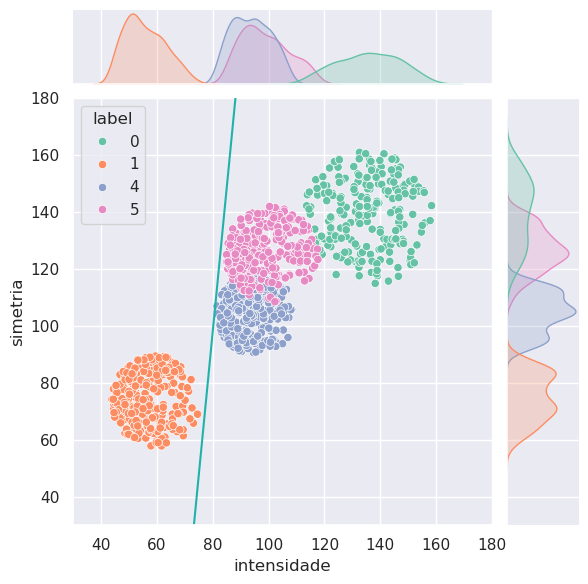

In [35]:
#Instanciando o objeto:
PLA_1x5 = PLA (n_int = 20000)

#Treinando:
PLA_1x5.fit(X = X_train_1x5, Y = y_train_1x5)

#Obtendo os pesos:
PLA_w_1x5 = PLA_1x5.get_w()

#Observando no gráfico:
plot_alg (w_lista = [PLA_w_1x5])

Relatório de Eficácia:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



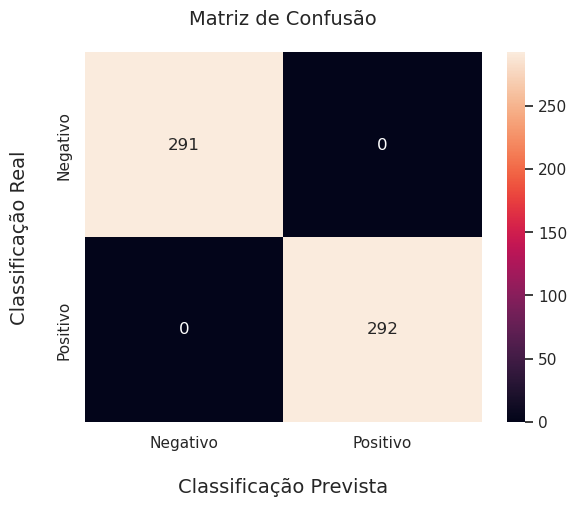

In [36]:
plot_relatorio_eff (Y_pred = PLA_1x5.predict(X = X_test_1x5), Y_real = y_test_1x5)

### Regressão Linear

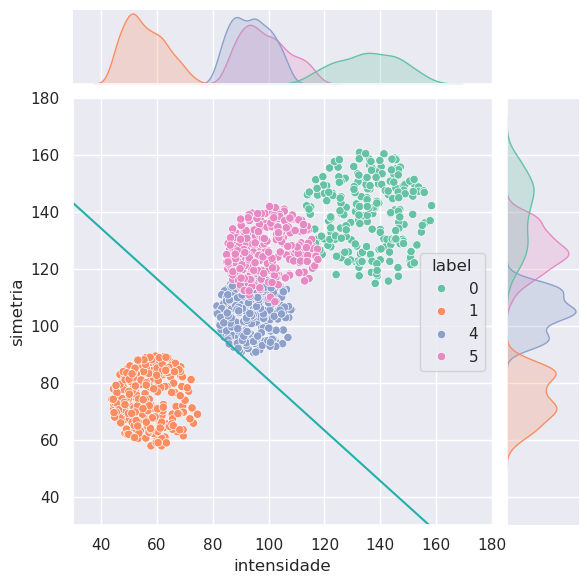

In [37]:
#Instanciando o objeto:
Rlin_1x5 = Reg_Lin ()

#Treinando:
Rlin_1x5.fit(X = X_train_1x5, Y = y_train_1x5)

#Obtendo os pesos:
Rlin_w_1x5 = Rlin_1x5.get_w()

#Observando no gráfico:
plot_alg (w_lista = [Rlin_w_1x5])

Relatório de Eficácia:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



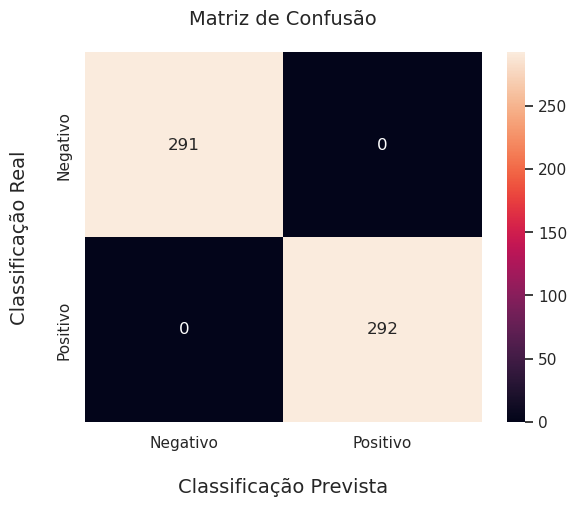

In [38]:
plot_relatorio_eff (Y_pred = Rlin_1x5.predict(X = X_test_1x5), Y_real = y_test_1x5)

### Regressão Logística

/home/joao/Documentos/UFPB/P5/AM/Projeto_1/Algoritmos.py:160: RuntimeWarning: overflow encountered in exp
  vsoma += (yn * xn) / (1 + np.exp(aux, dtype = "float64"))


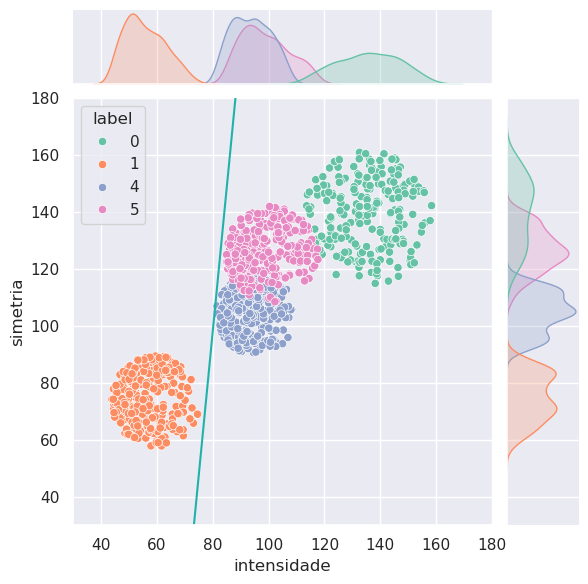

In [39]:
#Instanciando o objeto:
Rlog_1x5 = Reg_Log (n_int = 60000, tam_batch = 350)

#Treinando:
Rlog_1x5.fit(X = X_train_1x5, Y = y_train_1x5)

#Obtendo os pesos:
Rlog_w_1x5 = PLA_1x5.get_w()

#Observando no gráfico:
plot_alg (w_lista = [Rlog_w_1x5])

Relatório de Eficácia:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



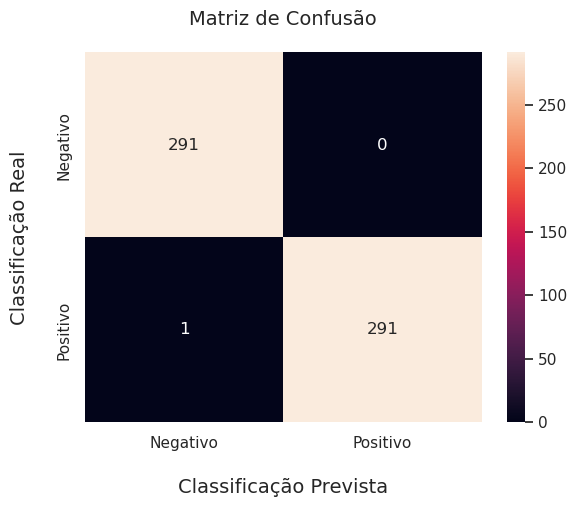

In [40]:
plot_relatorio_eff (Y_pred = Rlog_1x5.predict(X = X_test_1x5), Y_real = y_test_1x5)

### Relatório de Eficácia

## Classificação de Dígitos Completo

In [41]:
class UmVSTodos ():
    def __init__ (self, ordem : list, n_int : int = 1000, modelo = None) -> None:
        self.modelo = modelo(n_int = n_int)
        self.ordem = ordem
    
    def acuracia (self, X : np.array, Y : np.array) -> float:
        soma_PCC = 0

        for xi, yi in zip (X, Y):
            if (self.__predict_x(x = xi) == yi):
                soma_PCC += 1
        
        return (soma_PCC/len(X))
        
    def fit (self, X : np.array, Y : np.array) -> None:
        novo_X = X
        novo_Y = Y
        fila = self.ordem
        self.w_lista = []

        while (len(fila) > 0):
            aux = []
            index_lista = []

            #Adequando as labels
            for i in range(len(novo_Y)):
                if (novo_Y[i] == fila[0]):
                    aux.append(1)
                    index_lista.append(i)
                
                else:
                    aux.append(-1)
            
            #Treinando os pesos de acordo com o modelo
            novo_Y = aux
            self.modelo.fit(X = novo_X, Y = novo_Y)
            self.w_lista.append(self.modelo.get_w())

            #Atualizando as listas, removendo as labels já treinadas
            novo_X = np.delete (novo_X, index_lista)
            novo_Y = np.delete (novo_Y, index_lista)
            fila.remove(fila[0])

        return

    def predict (self, X : np.array) -> np.array:
        y_predict = [self.__predict_x(x = xi) for xi in X]

        return y_predict

    def __predict_x (self, x : np.array) -> int:
        n_class = len(self.w_lista)

        for i in range (n_class):
            self.modelo.set_w(novo_w = self.w_lista[i])

            if (self.modelo.predict(X = x) == 1):
                return self.ordem[i]
            
        else:
            return self.ordem[-1]

In [42]:
# a = np.array([[1, 2], ])

# novo_X = np.delete (novo_X, index_lista)

### Perceptron Learning Algorithm (PLA)

In [43]:
# #Instanciando o objeto:
# PLA_1vTodos = UmVSTodos (ordem = [0, 1, 4, 5], n_int = 20000, modelo = PLA)

# #Treinando:
# PLA_1vTodos.fit(X = X_train, Y = y_train)

# #Obtendo os pesos:
# PLA_w_1vTodos = PLA_1vTodos.get_w()

# #Observando os resultados:
# print(PLA_1vTodos.acuracia(X = X_test, Y = y_test, w_lista = PLA_w_1vTodos))

In [44]:
# plot_alg (w_lista = [PLA_w_1vTodos])

### Regressão Linear

### Regressão Logística

### Relatório de Eficácia

## Comparação dos Classificadores

## Implementações Avançadas

### Weight-Decay para a Regressão Logística

### Definindo a Melhor Ordem